In [1]:
# project: p13
# submitter: wchen394
# partner: zyu293
# hours: 2

In [2]:
import os, requests,json
import numpy as np
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
import matplotlib

from matplotlib import pyplot as plt

In [3]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!") 
    r = requests.get(url)
    r.raise_for_status()
    data = r.text
        
    f = open(filename, "w", encoding="utf-8")
    f.write(data)
    f.close()
    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-s21-projects/master/p13/countries.json")

'countries.json already exists!'

In [5]:
countries = pd.read_json('countries.json')

In [6]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

def qry(sql):
    return pd.read_sql(sql, conn)
countries

area  birth-rate  coastline      continent           country  \
0     756950       15.23       0.85  South America             Chile   
1        665       17.80      24.21           Asia           Bahrain   
2      22966       28.84       1.68  North America            Belize   
3     582650       39.72       0.09         Africa             Kenya   
4      11854       33.05       3.12      Australia  Marshall Islands   
..       ...         ...        ...            ...               ...   
169  2381740       17.14       0.04         Africa           Algeria   
170   103000       13.64       4.83         Europe           Iceland   
171      748       25.37      56.02      Australia             Tonga   
172    27750       36.44       6.38  North America             Haiti   
173  1284000       45.73       0.00         Africa              Chad   

     death-rate  gdp-per-capita  infant-mortality literacy  net-migration  \
0          5.81            9900              8.80     96,2           0.00   
1          4.14           16900             17.27     89,1           1.05   
2          5.72            4900             25.69     94,1           0.00   
3         14.02            1000             61.47     85,1          -0.10   
4          4.78            1600             29.45     93,7          -6.04   
..          ...             ...               ...      ...            ...   
169        4.61            6000             31.00     70,0          -0.39   
170        6.72           30900              3.31     99,9           2.38   
171        5.28            2200             12.62     98,5           0.00   
172       12.17            1600             73.45     52,9          -3.40   
173       16.38            1200             93.82     47,5          -0.11   

    phones  population               region  
0    213,0    16134219  LATIN AMER. & CARIB  
1    281,3      698585            NEAR EAST  
2    115,7      287730  LATIN AMER. & CARIB  
3      8,1    34707817   SUB-SAHARAN AFRICA  
4     91,2       60422              OCEANIA  
..     ...         ...                  ...  
169   78,1    32930091      NORTHERN AFRICA  
170  647,7      299388       WESTERN EUROPE  
171   97,7      114689              OCEANIA  
172   16,9     8308504  LATIN AMER. & CARIB  
173    1,3     9944201   SUB-SAHARAN AFRICA  

[174 rows x 13 columns]

In [7]:
#Q1: In our dataset, how many countries are in each continent?
df1 = qry("""
SELECT continent, COUNT(*) AS `number of countries`
FROM countries
GROUP BY continent
ORDER BY `number of countries` DESC, continent ASC
""")
df1

continent  number of countries
0         Africa                   47
1         Europe                   41
2           Asia                   38
3  North America                   24
4      Australia                   12
5  South America                   12

In [8]:
def bar_plot(df, xlabel, ylabel):
    df_plot = df.set_index(xlabel)
    ax = df_plot[ylabel].plot.bar()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

<AxesSubplot:xlabel='continent', ylabel='number of countries'>

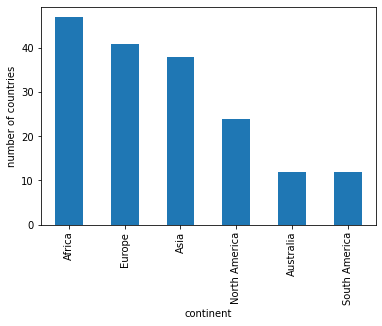

In [9]:
#Q2: How many countries are in each continent? (answer with a plot)
bar_plot(df1, "continent", "number of countries")

In [10]:
#Q3: What is the total population of each continent?
df3 = qry("""
SELECT continent, SUM(population)/1000000.0 AS `total population (million)`
FROM countries
GROUP BY continent
ORDER BY `total population (million)` DESC
""")
df3

continent  total population (million)
0           Asia                 3739.902863
1         Africa                  807.299195
2         Europe                  792.053486
3  North America                  515.041558
4  South America                  375.441666
5      Australia                   32.163025

<AxesSubplot:xlabel='continent', ylabel='total population (million)'>

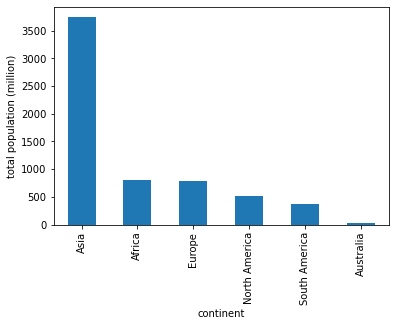

In [11]:
#Q4: What is the total population of each continent? (answer with a plot)
bar_plot(df3, "continent", "total population (million)")

In [12]:
#Q5: What is the population of each country in South America?
df5 = qry("""
SELECT country, population
FROM countries
GROUP BY country
HAVING continent = 'South America'
ORDER BY population DESC
""")
df5

country  population
0      Brazil   188078227
1    Colombia    43593035
2   Argentina    39921833
3        Peru    28302603
4   Venezuela    25730435
5       Chile    16134219
6     Ecuador    13547510
7     Bolivia     8989046
8    Paraguay     6506464
9     Uruguay     3431932
10     Guyana      767245
11   Suriname      439117

In [13]:
#Q6: What are the top 10 countries that have the largest real GDP?
df6 = qry("""
SELECT country, population*`gdp-per-capita`/1000000000.0 AS `Real GDP (billion)`
FROM countries
ORDER BY `Real GDP (billion)` DESC
LIMIT 10
""")
df6

country  Real GDP (billion)
0   United States        11281.191327
1           China         6569.868565
2           Japan         3594.473830
3           India         3176.520785
4         Germany         2274.855452
5          France         1680.181354
6  United Kingdom         1678.873538
7           Italy         1552.164690
8          Brazil         1429.394525
9          Russia         1271.752506

<AxesSubplot:xlabel='country', ylabel='Real GDP (billion)'>

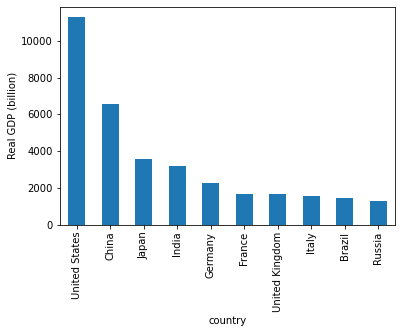

In [14]:
#Q7: What are the top 10 countries that have the largest real GDP? (answer with a plot)
bar_plot(df6, "country", "Real GDP (billion)")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='literacy'>

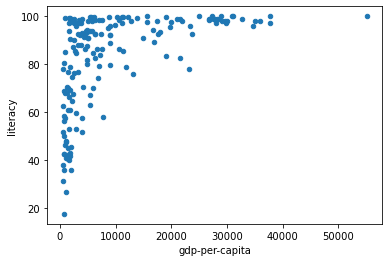

In [15]:
#Q8: What is the relationship between GDP per capita and literacy?
df8 = qry("""
SELECT `gdp-per-capita`, literacy
FROM countries
""")
df8["literacy"] = df8["literacy"].apply(lambda x: float(x.replace(',','.')))
df8.plot.scatter(x="gdp-per-capita", y="literacy")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

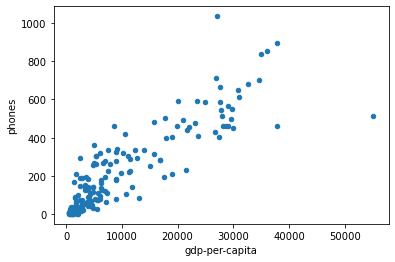

In [16]:
#Q9: What is the relationship between GDP per capita and phones?
df9 = qry("""
SELECT `gdp-per-capita`, phones
FROM countries
""")
df9['phones'] = df9['phones'].apply(lambda x: float(x.replace(',','.')))
df9.plot.scatter(x="gdp-per-capita", y="phones")

In [17]:
#Q10: What is the correlation between GDP per capita and phones?
df9.corr()['gdp-per-capita']["phones"]

0.8786946640591311

<AxesSubplot:xlabel='gdp-per-capita', ylabel='birth-rate'>

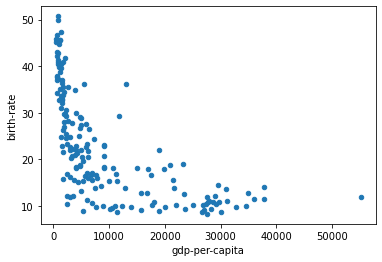

In [18]:
#Q11: What is the relationship between GDP per capita and birth rates?
df11 = qry("""
SELECT `gdp-per-capita`, `birth-rate`
FROM countries
""")
df11.plot.scatter(x="gdp-per-capita", y="birth-rate")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse birth-rate'>

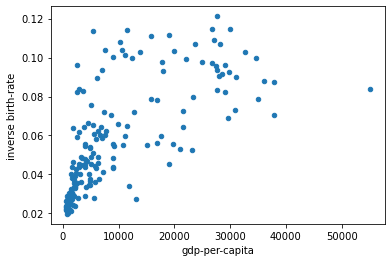

In [19]:
#Q12: What is the relationship between GDP per capita and inverse of birth rates?
df12 = qry("""
SELECT `gdp-per-capita`, 1/`birth-rate` AS `inverse birth-rate`
FROM countries
""")
df12.plot.scatter(x="gdp-per-capita", y="inverse birth-rate")


In [20]:
#Q13: fit a y = m * x + n line to the scatter plot in question 12 using the least-squares method; what are the coefficients m and n?
df12["1"] = 1
res = np.linalg.lstsq(df12[["gdp-per-capita", "1"]], df12["inverse birth-rate"], rcond=None)
coefficients = res[0] 
m = coefficients[0] 
n = coefficients[1] 
coefficients_tuple = (m,n)
coefficients_tuple

(1.8365703926233426e-06, 0.03916624252079354)

In [21]:
#Q14: When gdp-per-capita = 30000, what is the expected value for birth rate according to the regression model from Q13?
exp_birth_rate = 1/(30000 * m + n)
exp_birth_rate

10.60857644448761

<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse birth-rate'>

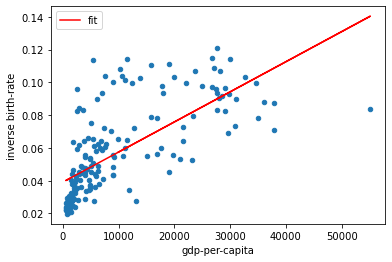

In [22]:
#Q15: plot the regression line to the scatter plot
ax = df12.plot.scatter(x="gdp-per-capita", y="inverse birth-rate")

df12["fit"] = df12["gdp-per-capita"] * m + n
df12.plot.line(x="gdp-per-capita", y="fit", c='red', ax=ax)


In [23]:
#Q16: What are the top 15 countries that have the largest gap between birth rate and death rate?

df16 = qry("""
SELECT country, `birth-rate`, `death-rate`
FROM countries
ORDER BY `birth-rate`-`death-rate` DESC
LIMIT 15
""")

df16

country  birth-rate  death-rate
0             Uganda       47.35       12.24
1              Yemen       42.89        8.30
2               Mali       49.82       16.89
3               Oman       36.24        3.81
4         Madagascar       41.41       11.11
5       Burkina Faso       45.62       15.60
6              Niger       50.73       20.91
7               Chad       45.73       16.38
8         Mauritania       40.99       12.16
9            Burundi       42.22       13.46
10           Comoros       36.93        8.20
11           Somalia       45.13       16.63
12  Marshall Islands       33.05        4.78
13          Maldives       34.81        7.06
14              Togo       37.01        9.83

Text(0, 0.5, 'country')

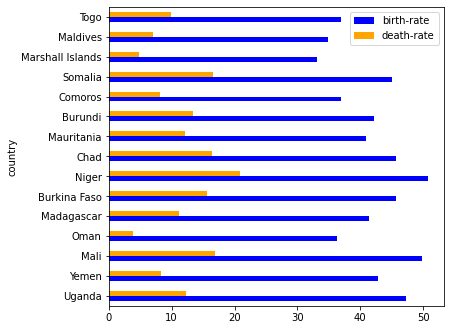

In [24]:
#Q17: What are the top 15 countries that have the largest gap between birth rate and death rate? (answer with a plot)
df17= df16.set_index("country")
ax = df17.plot.barh(figsize = (6,5.5),color = ['blue','orange'])
ax.set_ylabel("country")

<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

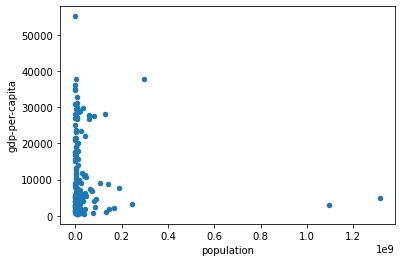

In [25]:
#Q18: What is the relationship between population and gdp-per-capita? (answer with a plot)
df18 = qry("""
SELECT `gdp-per-capita`, population
FROM countries
""")
df18.plot.scatter(x="population", y="gdp-per-capita")

In [26]:
#Q19: Did you notice the four outliers? Which countries are they?
outlier_pop= qry("""
SELECT country, population, `gdp-per-capita`
FROM countries
ORDER BY population DESC
LIMIT 2
""") 
outlier_gdp= qry("""
SELECT country, population, `gdp-per-capita`
FROM countries
ORDER BY `gdp-per-capita` DESC
LIMIT 2
""")
outlier_pop = outlier_pop.sort_values(by = "gdp-per-capita")
outlier_gdp = outlier_gdp.sort_values(by = "population", ascending=False)
df19 = outlier_pop.append(outlier_gdp,ignore_index=True, sort=False)
df19

country  population  gdp-per-capita
0          India  1095351995            2900
1          China  1313973713            5000
2  United States   298444215           37800
3     Luxembourg      474413           55100

Text(0, 0.5, '')

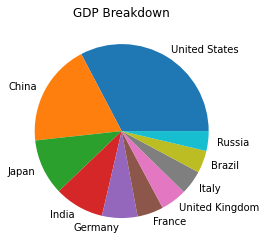

In [27]:
#Q20: what are the top 10 countries that have the largest real GDP? (answer with a plot)
real_gdp = df6.set_index("country")
ax20= real_gdp["Real GDP (billion)"].plot.pie()
ax20.set_title("GDP Breakdown")
ax20.set_ylabel(None)

In [28]:
conn.close()